## Lab Assignment 01

 ## WARNING!
 Please note that the questions provided in this assignment are exclusively for your personal use in this course. You are strictly prohibited from distributing, sharing, or publishing these questions in any form or through any medium. This includes, but is not limited to, posting on websites, forums, social media platforms, or sharing with individuals not enrolled in this course. This measure is to ensure the integrity and educational value of the assignment for all students. Thank you for your cooperation and understanding.

Dr. Levent Bulut

## SUBMISSIONS INSTRUCTIONS:
**Google Colab File**: Submit your coding work as a Jupyter notebook file. The file should be named in the following format: "Lab01_LASTNAME_FIRSTINITIAL_SP24". For example, if your name is Leo Bulut, the file name should be "Lab01_Bulut_L_SP24".

**Word Document**: Submit a Word document with the same naming format as above. The Word document should only include your name at the top and your answers to each numbered question. Do not include the questions themselves in the document. Your name should be clearly written at the top of the document.

Please be aware that including the questions in your Word document submission will result in a deduction of points. Ensure you adhere to these guidelines for proper submission.

## Background
* You are being tasked to make sense of bank data.  The dataset in this lab comes from a large financial services firm and includes data from account holders. It focuses on those with home equity lines of credit, auto loans, and other short- to medium-term credit products. The dataset, termed 'BANK01' is a little bit dirty and your job is to clean it.
* A key aspect of the data is the target variable, which indicates the total new sales (INT_TGT).

## Data Dictionary:
#### Target Variable:
* **INT_TGT**: New Sales  (Accepts only non-negative numbers, including zero or NA)

#### Features:
**RFM1**: Average Sales Past Three Years (Accepts only non-negative numbers, including zero or NA)  

**RFM2**: Average Sales Lifetime (Accepts only non-negative numbers, including zero or NA)

**RFM3**: Average Sales Past Three Years Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM4**: Last Product Purchase Amount (Accepts only non-negative numbers, including zero or NA)

**RFM5**: Count Purchased Past 3 Years (Accepts only non-negative numbers, including zero or NA)

**RFM6**: Count Purchased Lifetime (Accepts only non-negative numbers, including zero or NA)

**RFM7**: Count Purchased Past 3 Years Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM8**: Count Purchased Lifetime Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM9**: Months Since Last Purchase (Accepts only non-negative numbers, including zero or NA)

**RFM10**: Count Total Promos Past Year (Accepts only non-negative numbers, including zero or NA)

**RFM11**: Count Direct Promos Past Year (Accepts only non-negative numbers, including zero or NA)

**RFM12**: Customer Tenure (Accepts only non-negative numbers, including zero or NA)

**DEMOG_AGE**: Customer Age Customer Tenure (Accepts only non-negative numbers, including zero or NA. Extremely high age values, anything higher than 130, should be treated as data entry error.)

**DEMOG_GENF**: Female Binary (yes/no)

**DEMOG_GENM**: Male Binary (yes/no)

**DEMOG_HO**: Homeowner Binary (yes/no)

**DEMOG_HOMEVAL**: Home Value (Accepts only non-negative numbers, including zero or NA)

**DEMOG_INC**: Income (Accepts only non-negative numbers, including zero or NA)

**DEMOG_PR**: Percentage retired in the area (Accepts only non-negative numbers including zero or NA. The highest value is 100.)


# Solve the "Spoiled cat problem"!

The "Spoiled Cat Problem" is a complex challenge in data science, resembling an unpredictable, fickle cat. It involves sophisticated data cleaning and analysis, where datasets display confusing, nonlinear patterns. This long-standing scientific puzzle tests advanced data techniques and remains unsolved, symbolizing a quest for clarity in chaotic data.

Well, it turns out that the "Spoiled Cat Problem" was actually a made up concept by your professor. It doesn't really exist. But, we might actually have a cat-related issue. The rumor has it, the only original copy of this dataset was left unattended while the person responsible for the the data collection stepped out for coffee. During this time, her mischievous cat, mistaking the computer mouse for a real one, ended up tampering with the dataset. If you don't believe me, you can consult your cat about such a scenario's likelihood! As a result, simple "Yes" responses may have turned into "Yesssssss," and numerical entries could have been changed to negative or absurdly high values. So, as you work through the questions, please keep this peculiar situation in mind.





## Read data in Google Colab

In [17]:
import pandas as pd

# Load the dataset
file_path = '/content/bank01-1.csv'
data = pd.read_csv(file_path)

# Display the data types and check for any mixed types
print(data.dtypes)

# Display the first few rows for an initial inspection
print(data.head())


int_tgt          float64
demog_age        float64
demog_ho          object
demog_homeval     object
demog_inc        float64
demog_pr           int64
rfm1              object
rfm2             float64
rfm3             float64
rfm4             float64
rfm5               int64
rfm6               int64
rfm7               int64
rfm8               int64
rfm9               int64
rfm10              int64
rfm11              int64
rfm12              int64
demog_genf        object
demog_genm        object
dtype: object
   int_tgt  demog_age demog_ho demog_homeval  demog_inc  demog_pr   rfm1  \
0      0.0       42.0       no         90780    66811.0         0    7.4   
1      0.0       39.0      yes        191693   101626.0         0   5.14   
2      0.0       72.0      yes        141773    54565.0         1  12.75   
3      0.0       63.0       no         35283        0.0         1   3.67   
4      0.0        NaN       no        500006        0.0        24     15   

    rfm2   rfm3  rfm4  rfm5  

<ipython-input-17-72710e311e96>:5: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


## Task 1
Your task is to conduct a thorough inspection of each variable in the dataset, keeping in mind the expected values outlined in the data dictionary. Without modifying the data, write a summary that highlights any issues you find for each variable. For example, if there are incorrectly entered 'NA' values, numbers that fall outside the expected range, or any other data inconsistencies, please note these in your response to question 1. Conversely, if a variable appears to have no issues with its data entries, simply state that there are no observed issues with that particular variable.

In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/bank01-1.csv')

# Define a dictionary to store validation results for each feature
validation_results = {}

# Columns to check as per your data dictionary
features_to_check = ['int_tgt', 'rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6',
                     'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'demog_age',
                     'demog_homeval', 'demog_inc', 'demog_pr']

# Check each feature for non-negative values, NA, and count of negative values
for feature in features_to_check:
    # Convert to numeric, with errors coerced to NaN for non-numeric values
    numeric_column = pd.to_numeric(data[feature], errors='coerce')

    # Count of NA values
    has_na = numeric_column.isna().sum()

    # Count of negative values
    negative_count = (numeric_column < 0).sum()

    validation_results[feature] = {
        'has_na': has_na,
        'negative_count': negative_count
    }

# Additional checks for specific ranges
# Check for 'demog_age' values above 130 (data entry errors)
validation_results['demog_age']['above_130'] = (pd.to_numeric(data['demog_age'], errors='coerce') > 130).sum()

# Check 'demog_pr' values above 100 (as the highest percentage is 100)
validation_results['demog_pr']['above_100'] = (pd.to_numeric(data['demog_pr'], errors='coerce') > 100).sum()

# Display results
print(validation_results)


{'int_tgt': {'has_na': 0, 'negative_count': 21}, 'rfm1': {'has_na': 3, 'negative_count': 0}, 'rfm2': {'has_na': 0, 'negative_count': 0}, 'rfm3': {'has_na': 9912, 'negative_count': 0}, 'rfm4': {'has_na': 0, 'negative_count': 0}, 'rfm5': {'has_na': 0, 'negative_count': 0}, 'rfm6': {'has_na': 0, 'negative_count': 0}, 'rfm7': {'has_na': 0, 'negative_count': 0}, 'rfm8': {'has_na': 0, 'negative_count': 0}, 'rfm9': {'has_na': 0, 'negative_count': 0}, 'rfm10': {'has_na': 0, 'negative_count': 0}, 'rfm11': {'has_na': 0, 'negative_count': 0}, 'rfm12': {'has_na': 0, 'negative_count': 0}, 'demog_age': {'has_na': 31611, 'negative_count': 3, 'above_130': 2}, 'demog_homeval': {'has_na': 1, 'negative_count': 1}, 'demog_inc': {'has_na': 0, 'negative_count': 0}, 'demog_pr': {'has_na': 0, 'negative_count': 0, 'above_100': 0}}


<ipython-input-26-1c5d9232189b>:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/bank01-1.csv')


In [31]:

# Check for invalid values in demog_genf and demog_genm
invalid_genf = data[~data['demog_genf'].isin(['yes', 'no'])]
invalid_genm = data[~data['demog_genm'].isin(['yes', 'no'])]
invalid_genho = data[~data['demog_ho'].isin(['yes', 'no'])]

# Count rows with invalid values
invalid_genf_count = len(invalid_genf)
invalid_genm_count = len(invalid_genm)
invalid_genho_count=len(invalid_genho)
# Check for rows where both columns have "yes" or both have "no"
both_yes_or_no = data[(data['demog_genf'] == data['demog_genm'])]

# Count rows where both are "yes" or both are "no"
both_yes_or_no_count = len(both_yes_or_no)

# Print results
print(f"Invalid entries in 'demog_genf': {invalid_genf_count}")
print(f"Invalid entries in 'demog_genm': {invalid_genm_count}")
print(f"Invalid entries in 'demog_genm': {invalid_genho_count}")
print(f"Rows where both 'demog_genf' and 'demog_genm' are the same: {both_yes_or_no_count}")


Invalid entries in 'demog_genf': 3
Invalid entries in 'demog_genm': 4
Invalid entries in 'demog_genm': 0
Rows where both 'demog_genf' and 'demog_genm' are the same: 0


## Task 2

Duplicate the original 'bank01' dataset and rename the copy as 'bank_[yourlastname]' (for example, Jane Doe would rename it to 'bank_doe'). Then proceed to make the specified adjustments in your renamed dataset, 'bank_[yourlastname]'


* For any data point that falls outside its expected range, label it as missing in the dataset.
*  Correct any spelling mistakes you encounter. For example, if the expected values are "YES" and "NO", but you find variations like "yes", "YESSSS", or "YESs", adjust them all to the standard form, which in this case would be "YES".


Once you've made the necessary modifications in your dataset, proceed to calculate the number of missing values and the percentage of missing values for each variable. Record your findings in the table provided in the Word document.





In [37]:
import pandas as pd

# Load the dataset
bank_chamarthi = pd.read_csv("bank01-1.csv", low_memory=False)

# Labelling missing in the dataset
bank_chamarthi['demog_age'] = bank_chamarthi['demog_age'].apply(lambda x: x if 18 <= x <= 100 else None)
bank_chamarthi['demog_inc'] = bank_chamarthi['demog_inc'].apply(lambda x: x if 10000 <= x <= 1000000 else None)
bank_chamarthi['demog_pr'] = bank_chamarthi['demog_pr'].apply(lambda x: x if 0 <= x <= 100 else None)

# Convert 'demog_homeval' to numeric, invalid values will be set as NaN
bank_chamarthi['demog_homeval'] = pd.to_numeric(bank_chamarthi['demog_homeval'], errors='coerce')

# Checking for the genders
valid_ho_values = ['yes', 'no']
bank_chamarthi['demog_ho'] = bank_chamarthi['demog_ho'].str.lower().apply(lambda x: x.upper() if x in valid_ho_values else None)

valid_gen_values = ['yes', 'no']  # Assuming 'yes' means female, 'no' means male
bank_chamarthi['demog_genf'] = bank_chamarthi['demog_genf'].str.lower().apply(lambda x: 'YES' if x == 'yes' else None)
bank_chamarthi['demog_genm'] = bank_chamarthi['demog_genm'].str.lower().apply(lambda x: 'YES' if x == 'yes' else None)

# Convert RFM columns to numeric, invalid values will be set as NaN
rfm_columns = ['rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12']
for col in rfm_columns:
    bank_chamarthi[col] = pd.to_numeric(bank_chamarthi[col], errors='coerce')  # Convert to numeric and set invalid to NaN

# Apply checks for RFM columns if they are supposed to be within a specific range
for col in rfm_columns:
    bank_chamarthi[col] = bank_chamarthi[col].apply(lambda x: x if 0 <= x <= 100 else None)

# Save the modified dataset
bank_chamarthi.to_csv('bank_chamarthi_modified.csv', index=False)


# Task 3:  Imputation of Missing Values


Dduplicate and modify the 'bank_[yourlastname]' dataset that you saved during Task 2. This new version of the dataset should be named 'bank_[yourlastname]_revised'. For example, if your last name is 'Doe', the new dataset should be named 'bank_doe_revised'. After creating this duplicate, you are to perform a series of data imputation techniques listed below:
 * For a numerical column with missing values, use the mean of the column to fill in the gaps.
* In the case of a categorical column with missing data, use the mode (most frequent value) for imputation. If there are multiple modes, use the first mode to replace missing values.
* Once you have completed the data imputation on the 'bank_[yourlastname]_revised' dataset, your next task is to calculate the descriptive statistics for two specific numerical variables (demog_age and rfm1) and a contingency table between two categorical variables (demog_ho and demog_genf). This step serves as a sanity check to ensure the integrity and reasonableness of your imputed data. Enter your findings in the speficied table in the word document provided.




In [39]:
import pandas as pd

# Load the original dataset (replace with the path to your actual dataset)
bank_chamarthi1 = pd.read_csv("bank_chamarthi_modified.csv")

# Duplication
bank_chamarthi_revised = bank_chamarthi1.copy()


# Using the mean for imputation
numerical_columns = ['demog_age', 'demog_inc', 'demog_pr', 'demog_homeval'] + \
                    ['rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12']
for col in numerical_columns:
    mean_value = bank_chamarthi_revised[col].mean()
    bank_chamarthi_revised[col].fillna(mean_value, inplace=True)

# For categorical columns, use the mode for imputation
categorical_columns = ['demog_ho', 'demog_genf', 'demog_genm']
for col in categorical_columns:
    # Get the mode (most frequent value)
    mode_value = bank_chamarthi_revised[col].mode()[0]
    bank_chamarthi_revised[col].fillna(mode_value, inplace=True)

age_stats = bank_chamarthi_revised['demog_age'].describe()
rfm1_stats = bank_chamarthi_revised['rfm1'].describe()

contingency_table = pd.crosstab(bank_chamarthi_revised['demog_ho'], bank_chamarthi_revised['demog_genf'])

# Print the results
print("Descriptive Statistics for 'demog_age':")
print(age_stats)
print("\nDescriptive Statistics for 'rfm1':")
print(rfm1_stats)
print("\nContingency Table for 'demog_ho' and 'demog_genf':")
print(contingency_table)

bank_chamarthi_revised.to_csv('bank_chamarthi_revised.csv', index=False)


<ipython-input-39-632e93afbc11>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_chamarthi_revised[col].fillna(mean_value, inplace=True)
<ipython-input-39-632e93afbc11>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Descriptive Statistics for 'demog_age':
count    127089.000000
mean         61.465494
std          13.907886
min          18.000000
25%          54.000000
50%          61.465494
75%          72.000000
max          89.000000
Name: demog_age, dtype: float64

Descriptive Statistics for 'rfm1':
count    127089.000000
mean         11.152152
std           7.505955
min           0.000000
25%           6.500000
50%          10.000000
75%          13.500000
max         100.000000
Name: rfm1, dtype: float64

Contingency Table for 'demog_ho' and 'demog_genf':
demog_genf    YES
demog_ho         
NO          57349
YES         69740


# Task 4


*   Using Python, calculate the **correlation** between the target variable "INT_TGT" and all numeric features in your 'bank_[yourlastname]_revised' dataset. Identify the numeric variable that shows the highest correlation coefficient (in absolute value) with "INT_TGT". Then, create a scatter plot in Python to visually represent the relationship between "INT_TGT" and this highly correlated numeric variable. After completing your plot, insert it into the left pane of the Word document provided for this assignment.
*   Based on the scatter plot you have created, write a brief paragraph discussing your observations. In your analysis, describe the nature of the relationship between the target variable and the numeric variable with the highest correlation coefficient. Is the relationship positive, negative, linear, or non-linear? Provide insights based on the data description and what you can infer from the scatter plot. Your paragraph should offer a clear interpretation of the data visualization, highlighting any notable patterns or trends you observe. Insert your answer to the right pane under Task 4.



The most correlated variable with INT_TGT is 'rfm2' with a correlation coefficient of 0.28320652421174025.


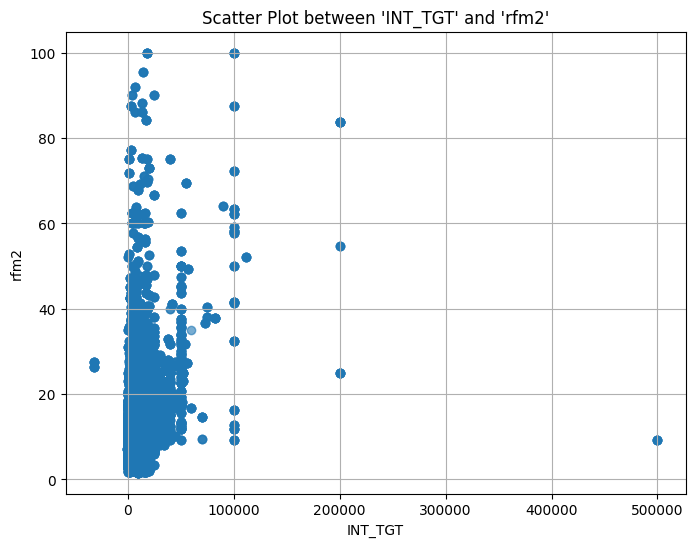

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

bank_chamarthi_revised = pd.read_csv("bank_chamarthi_revised.csv")
numeric_columns = bank_chamarthi_revised.select_dtypes(include=['number']).columns

# Calculating  Correlation
correlation_matrix = bank_chamarthi_revised[numeric_columns].corr()
correlations_with_target = correlation_matrix['int_tgt'].drop('int_tgt')

most_correlated_variable = correlations_with_target.abs().idxmax()
highest_correlation_value = correlations_with_target[most_correlated_variable]

print(f"The most correlated variable with INT_TGT is '{most_correlated_variable}' with a correlation coefficient of {highest_correlation_value}.")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(bank_chamarthi_revised['int_tgt'], bank_chamarthi_revised[most_correlated_variable], alpha=0.6)
plt.title(f"Scatter Plot between 'INT_TGT' and '{most_correlated_variable}'")
plt.xlabel('INT_TGT')
plt.ylabel(most_correlated_variable)
plt.grid(True)
plt.show()


# Task 5: Check for Outliers
In this task, you are required to identify outliers in the numerical variables of the 'bank_[yourlastname]_revised' dataset. You will use the Interquartile Range (IQR) method for this purpose. Additionally, you will create box and whisker plots for both the target variable and the numerical variable that shows the highest correlation (in absolute value) with the target variable.
* In one approach, outliers are the values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (where Q1 and Q3 are the first and third quartiles, respectively). Identify and list the outliers for each numerical variable and report your findings in the dedicated are in the word document provided. You can  just report the number of outliers detected for each variable.  
* Create a box and whisker plot for the target variable in your dataset and insert it intio the word document.
* Create a box and whisker plot for the numerical variable which shows the higest correlation (in absolute value) with the target variable and insert it intio the word document.  
* What these plots indicate about the distribution of the target variable and the most correlated numerical variable?



Number of outliers detected in 'int_tgt': 1113
Number of outliers detected in 'demog_age': 1092
Number of outliers detected in 'demog_homeval': 8449
Number of outliers detected in 'demog_inc': 8940
Number of outliers detected in 'demog_pr': 6488
Number of outliers detected in 'rfm1': 5427
Number of outliers detected in 'rfm2': 6533
Number of outliers detected in 'rfm3': 6093
Number of outliers detected in 'rfm4': 3197
Number of outliers detected in 'rfm5': 1493
Number of outliers detected in 'rfm6': 5217
Number of outliers detected in 'rfm7': 310
Number of outliers detected in 'rfm8': 2646
Number of outliers detected in 'rfm9': 19625
Number of outliers detected in 'rfm10': 24607
Number of outliers detected in 'rfm11': 14658
Number of outliers detected in 'rfm12': 917


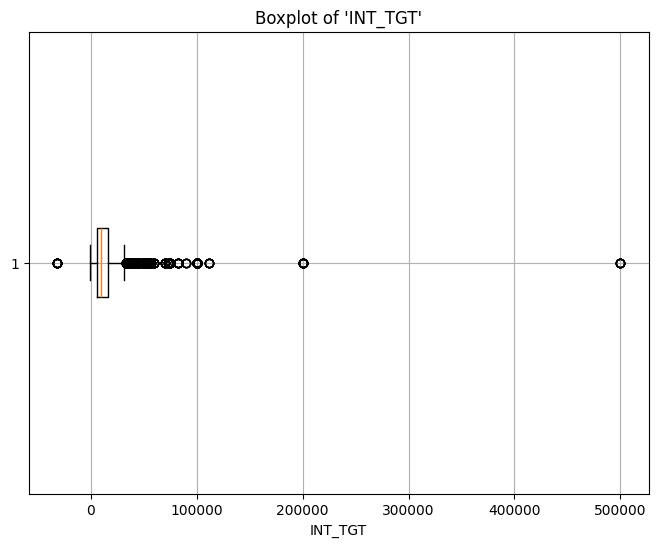

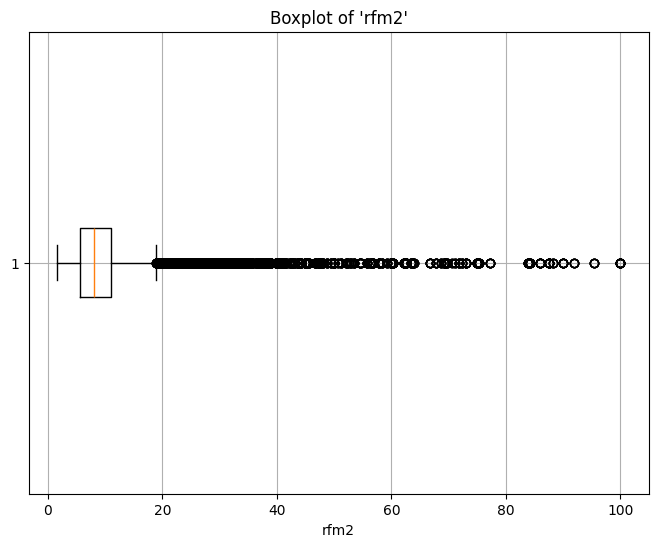

In [45]:
# If you utilized any coding to answer task 5, please input your code snippets here. Ensure that your codes are error-free when executed.
import pandas as pd
import matplotlib.pyplot as plt

bank_chamarthi_revised = pd.read_csv("bank_chamarthi_revised.csv")

numeric_columns = bank_chamarthi_revised.select_dtypes(include=['number']).columns

# Identifying outliers using IQR method for each numerical variable
outliers = {}
for col in numeric_columns:
    Q1 = bank_chamarthi_revised[col].quantile(0.25)
    Q3 = bank_chamarthi_revised[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = bank_chamarthi_revised[(bank_chamarthi_revised[col] < lower_bound) |
                                           (bank_chamarthi_revised[col] > upper_bound)].shape[0]

for col, count in outliers.items():
    print(f"Number of outliers detected in '{col}': {count}")

# Create a box and whisker plot for the target variable 'int_tgt'
plt.figure(figsize=(8, 6))
plt.boxplot(bank_chamarthi_revised['int_tgt'], vert=False)
plt.title("Boxplot of 'INT_TGT'")
plt.xlabel('INT_TGT')
plt.grid(True)
plt.show()

correlation_matrix = bank_chamarthi_revised[numeric_columns].corr()
correlations_with_target = correlation_matrix['int_tgt'].drop('int_tgt')
most_correlated_variable = correlations_with_target.abs().idxmax()

plt.figure(figsize=(8, 6))
plt.boxplot(bank_chamarthi_revised[most_correlated_variable], vert=False)
plt.title(f"Boxplot of '{most_correlated_variable}'")
plt.xlabel(most_correlated_variable)
plt.grid(True)
plt.show()
